In [2]:
%config InlineBackend.figure_format = 'retina'
%pylab inline
from nsaba.nsaba import nsaba
import matplotlib.pyplot as plt
import matplotlib.patches
from foof import syn
from foof.fit import FOOF
import numpy as np
import os
import scipy.io
import scipy.signal
import pandas as pd
import bisect
from foof import syn
import scipy.stats
import sklearn.mixture
import itertools

Populating the interactive namespace from numpy and matplotlib


In [26]:
p = '/Users/Torben/Documents/nsaba_foof/Subject1_PSD_Scout_0-500Hz.mat'
dat = scipy.io.loadmat(p)
freqs = np.squeeze(dat['Freqs'])
psds = np.squeeze(dat['TF'])
rownames = np.squeeze(dat['RowNames'])

p2 = '/Users/Torben/Documents/nsaba_foof/Subject_981954/Vertex_PSD_50Hz_981954.mat'
dat2 = scipy.io.loadmat(p2)
freqs = np.squeeze(dat2['Freqs'])
psds2 = np.squeeze(dat2['TF'])


p_vert = '/Users/Torben/Documents/nsaba_foof/Subject_981954/DK_Scout_Vertex_981954.mat'
vert = scipy.io.loadmat(p2)
#freqs = np.squeeze(dat['Freqs'])
#psds3 = np.squeeze(dat['TF'])

p3 = '/Users/Torben/Documents/nsaba_foof/Subject_981954/Sensor_PSD_50Hz_981954.mat'
dat3 = scipy.io.loadmat(p3)
freqs3 = np.squeeze(dat3['Freqs'])
psds3 = np.squeeze(dat3['TF'])

print dat.keys()
print dat2.keys()
print dat3.keys()
#print rownames

['Freqs', '__header__', '__globals__', 'RowNames', 'TF', '__version__']
['Freqs', '__header__', '__globals__', 'RowNames', 'TF', '__version__']
['Freqs', '__header__', '__globals__', 'RowNames', 'TF', '__version__']


0.585937499961


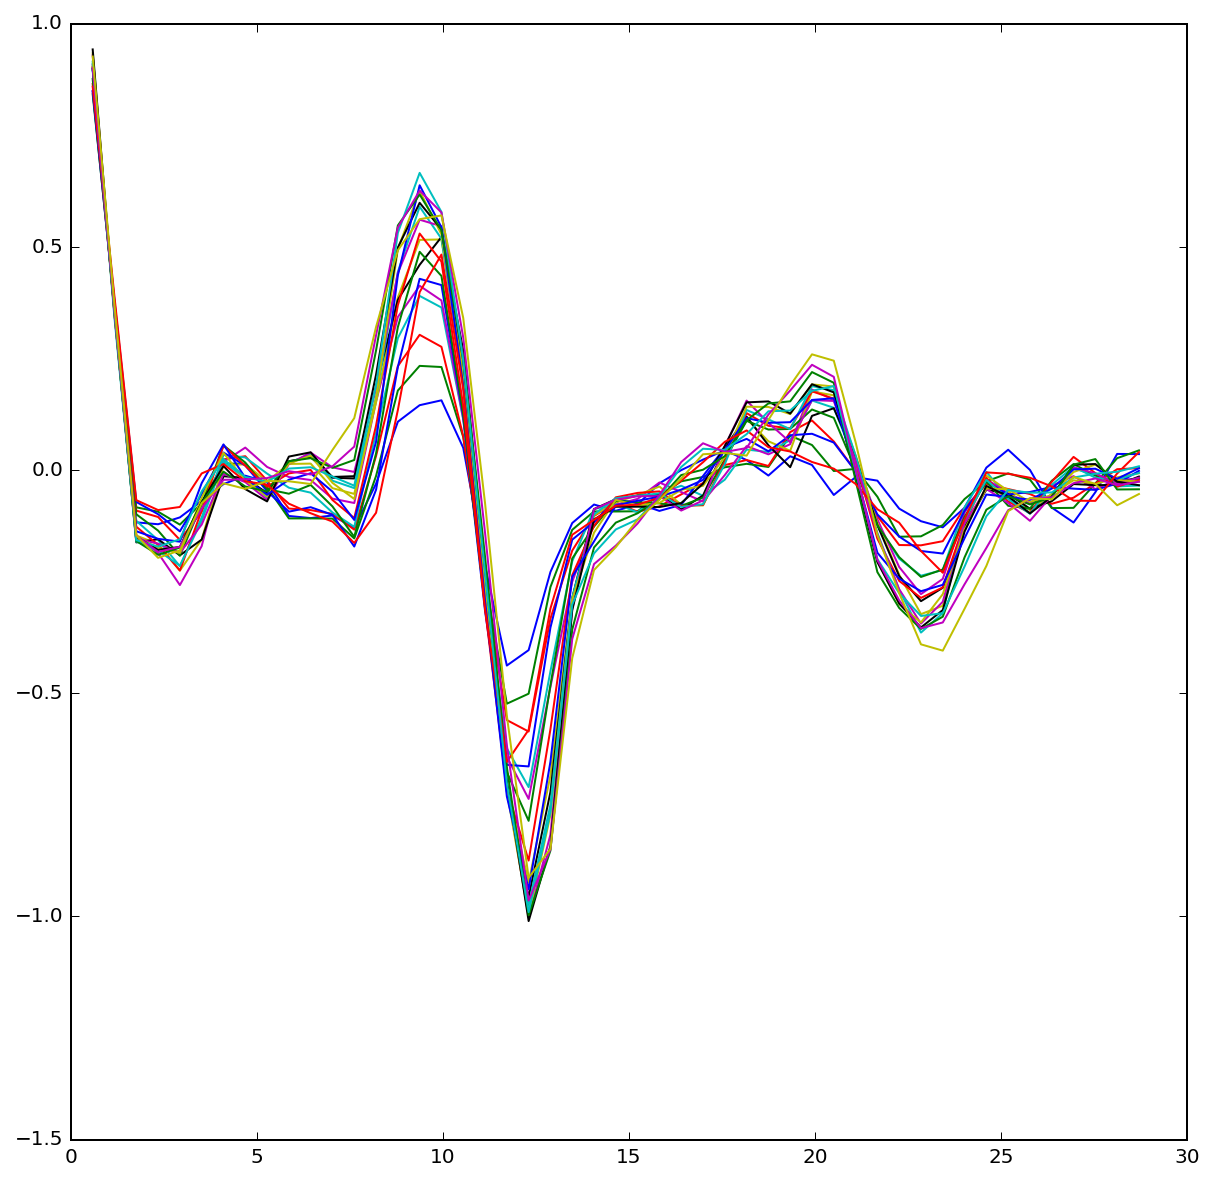

In [48]:
figure(figsize=(10,10))
print freqs[1]-freqs[0]
for x in xrange(20):
    plt.plot(freqs3[1:50],np.diff(np.log(psds3[x][0:50])))

Scout FOOFs


//anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


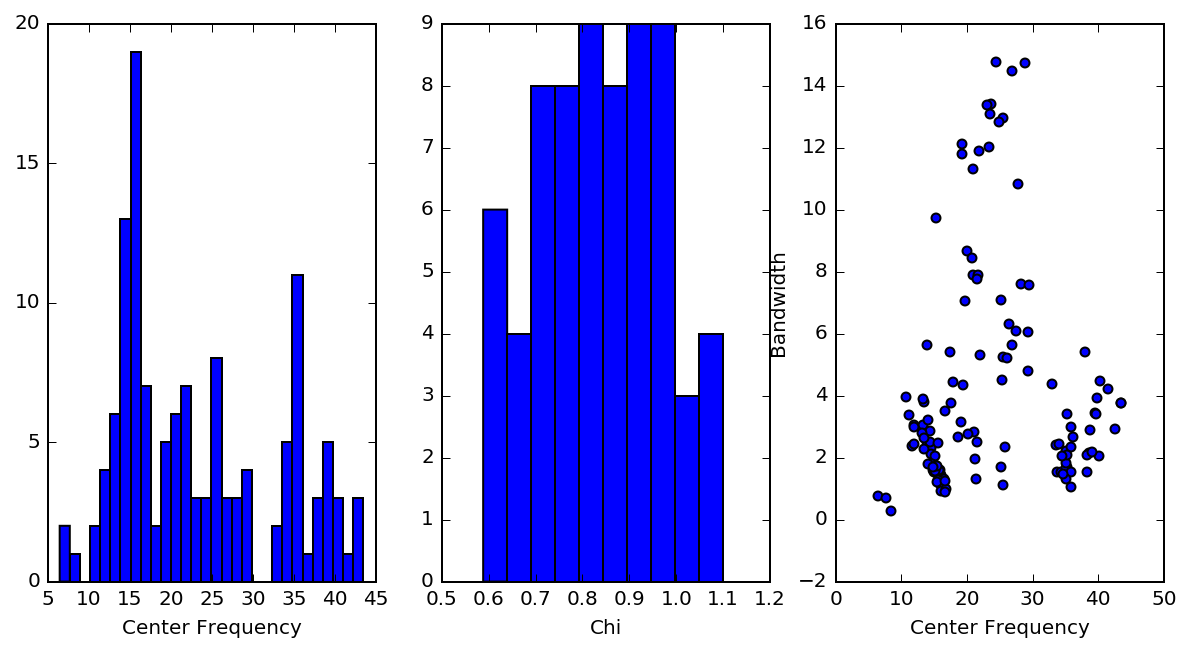

In [5]:
all_cfs = [];
all_bws = [];
all_chi = [];

deltas = [];
thetas = [];
alphas = [];
betas = [];
gammas = [];
hi_gammas = [];


for x in xrange(len(psds)):
    foof = FOOF(min_p=0.1,res = freqs[1]-freqs[0])
    temp_psd= np.expand_dims(psds[x,bisect.bisect(freqs,3):bisect.bisect(freqs,50)-1].T,axis=1)
    foof.model(freqs[bisect.bisect(freqs,3):bisect.bisect(freqs,50)-1],temp_psd)
    all_cfs.extend(foof.centers_)
    all_bws.extend(foof.stdevs_)
    all_chi.append(foof.chi_)
    
    for i in foof.centers_:
        
        if i > 0 and i<5:
            deltas.append(x)
            
        if i > 5 and i<8:
            thetas.append(x)
            
        if i > 8 and i<12:
            alphas.append(x)
            
        if i > 12 and i<20:
            betas.append(x)
        
        if i > 20 and i<30:
            gammas.append(x)
        
        if i > 30:
            hi_gammas.append(x)
            
print 'Scout FOOFs'
plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,3,1)
ax1.hist(all_cfs,30)
ax1.set_xlabel('Center Frequency')

ax2 = plt.subplot(1,3,2)
ax2.hist(all_chi)
ax2.set_xlabel('Chi')

ax3 = plt.subplot(1,3,3)
ax3.scatter(all_cfs,all_bws)
ax3.set_xlabel('Center Frequency')
ax3.set_ylabel('Bandwidth')

[  0.          0.5859375   1.171875    1.7578125   2.34375     2.9296875
   3.515625    4.1015625   4.6875      5.2734375   5.859375    6.4453125
   7.03125     7.6171875   8.203125    8.7890625   9.375       9.9609375
  10.546875   11.1328125  11.71875    12.3046875  12.890625   13.4765625
  14.0625     14.6484375  15.234375   15.8203125  16.40625    16.9921875
  17.578125   18.1640625  18.75       19.3359375  19.921875   20.5078125
  21.09375    21.6796875  22.265625   22.8515625  23.4375     24.0234375
  24.609375   25.1953125  25.78125    26.3671875  26.953125   27.5390625
  28.125      28.7109375  29.296875   29.8828125  30.46875    31.0546875
  31.640625   32.2265625  32.8125     33.3984375  33.984375   34.5703125
  35.15625    35.7421875  36.328125   36.9140625  37.5        38.0859375
  38.671875   39.2578125  39.84375    40.4296875  41.015625   41.6015625
  42.1875     42.7734375  43.359375   43.9453125  44.53125    45.1171875
  45.703125   46.2890625  46.875      47.4609375  4

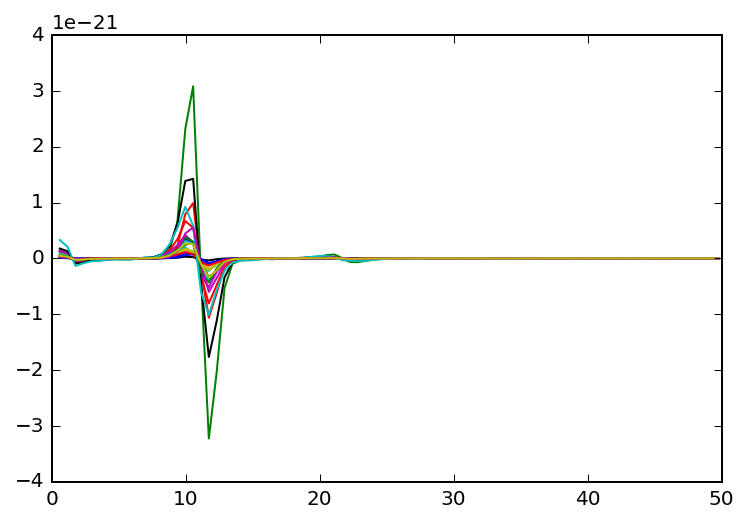

In [197]:
#list rownames where given oscillation is
for x in xrange(20):
    plt.plot(freqs[1:],np.diff(psds2[x,:]))
print freqs
print rownames[20]
#print 'Deltas:' + str([str(np.squeeze(rownames[x])) for x in deltas]) + '\n'
#print 'Thetas:' + str([str(np.squeeze(rownames[x])) for x in thetas])+ '\n'
#print 'Alphas:' + str([str(np.squeeze(rownames[x])) for x in alphas])+ '\n'
#print 'Betas:' + str([str(np.squeeze(rownames[x])) for x in betas])+ '\n'
#print 'Gammas:' + str([str(np.squeeze(rownames[x])) for x in gammas])+ '\n'
#print 'Hi Gammas:' + str([str(np.squeeze(rownames[x])) for x in hi_gammas])

In [50]:
#if you have oscillation x, are you likeley to have oscillation y?
logicmat = np.zeros((len(psds),3));
for x in xrange(len(psds)):
    if x in alphas:
        logicmat[x,0] = 1;
    if x in betas:
        logicmat[x,1] = 1;
    if x in gammas:
        logicmat[x,2] = 1;

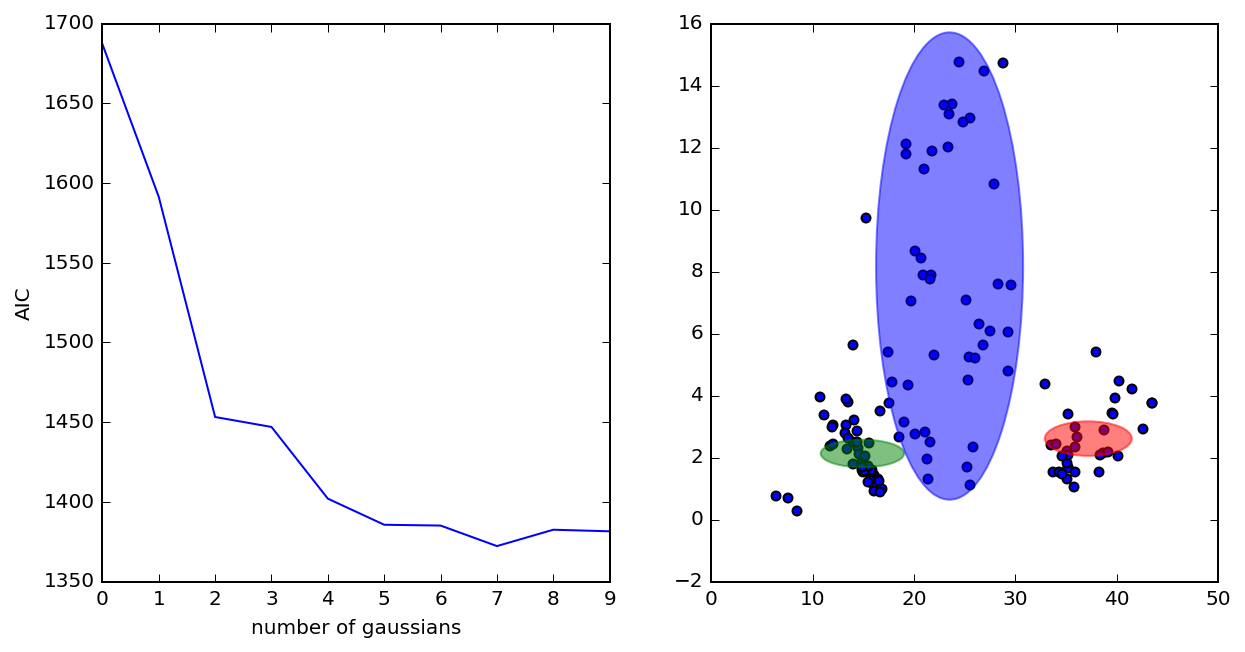

In [19]:
fits = [];
means = [];
covars = [];
for x in xrange(10):
    g = sklearn.mixture.GMM(n_components=x+1)
    g.fit(np.array([all_cfs,all_bws]).T)
    fits.append(g.aic(np.array([all_cfs,all_bws]).T))
    means.append(g.means_)
    covars.append(g._get_covars())

plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)
ax1.plot(fits)
ax1.set_ylabel('AIC')
ax1.set_xlabel('number of gaussians')


ax2 = plt.subplot(1,2,2)
ax2.scatter(all_cfs,all_bws)
#ax2.plot([x[0] for x in means[gaussian_fits]],[x[1] for x in means[gaussian_fits]],'rx')


gaussian_fits =3
g = sklearn.mixture.GMM(n_components=gaussian_fits)
g.fit(np.array([all_cfs,all_bws]).T)
color_iter = itertools.cycle(['r', 'g', 'b', 'c', 'm'])    
for i, (mean, covar,color) in enumerate(zip(g.means_, g._get_covars(),color_iter)):
    v, w = linalg.eigh(covar)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    #v = v*5
    ell = matplotlib.patches.Ellipse(mean, v[0], v[1], 180 + angle,color=color)
    ell.set_clip_box(ax2.bbox)
    ell.set_alpha(0.5)
    ax2.add_artist(ell)


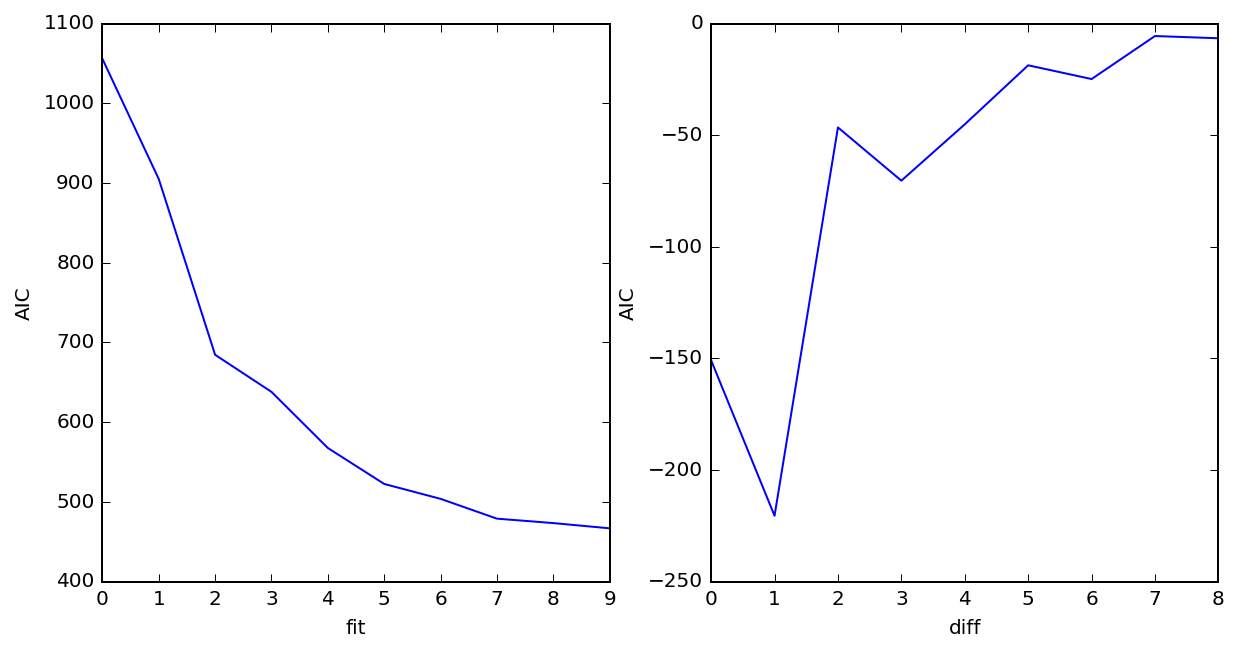

In [179]:
plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)
ax1.plot(fits)
ax1.set_ylabel('AIC')
ax1.set_xlabel('fit')

ax2 = plt.subplot(1,2,2)
ax2.plot(np.diff(fits))
ax2.set_ylabel('AIC')
ax2.set_xlabel('diff')
print max

In [46]:
all_cfs = [];
all_bws = [];
all_chi = [];
chis_w_high_cf = [];

for x in xrange(len(psds2)):
    foof = FOOF(min_p=0.1,res = freqs[1]-freqs[0])
    temp_psd= np.expand_dims(psds2[x,bisect.bisect(freqs,3):bisect.bisect(freqs,50)-1].T,axis=1)
    foof.model(freqs[bisect.bisect(freqs,3):bisect.bisect(freqs,50)-1],temp_psd)
    all_cfs.extend(foof.centers_)
    all_bws.extend(foof.stdevs_)
    all_chi.append(foof.chi_)
    for i in foof.centers_:
        if i > 40:
            chis_w_high_cf.append(foof.chi_)
            break
            


KeyboardInterrupt: 

20361 CFs from 15003 total Vertex FOOFs


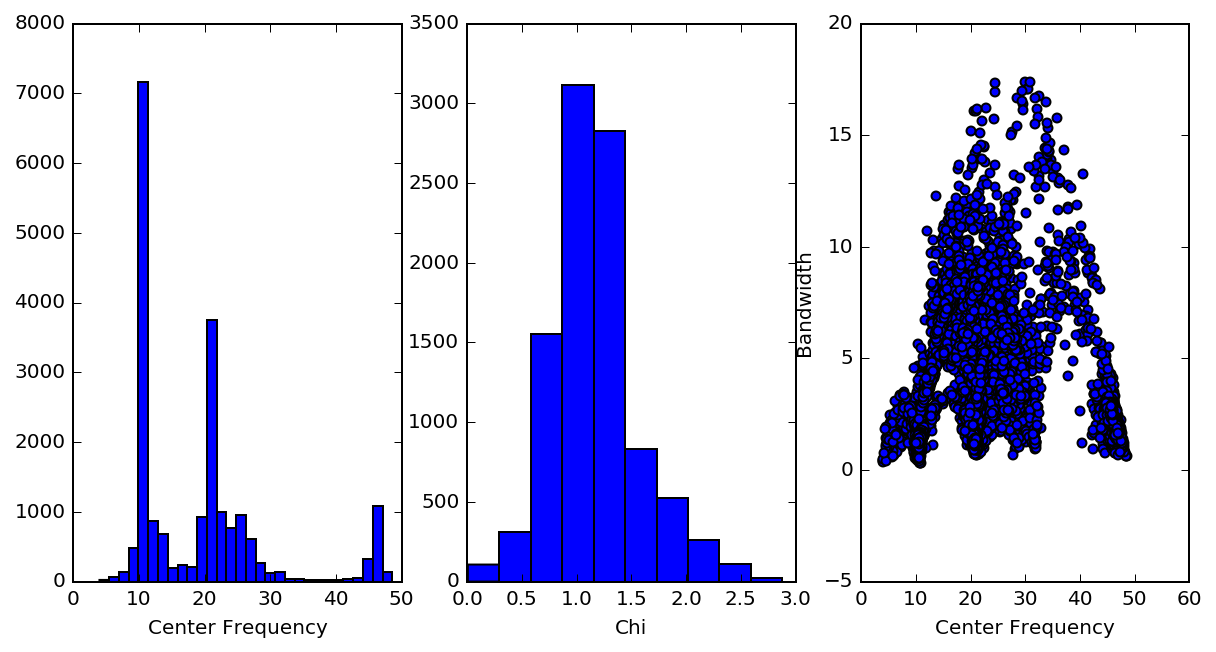

In [52]:
print str(len(all_cfs))+ ' CFs from ' +str(psds2.shape[0])+' total Vertex FOOFs'

plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,3,1)
ax1.hist(all_cfs,30)
ax1.set_xlabel('Center Frequency')

ax2 = plt.subplot(1,3,2)
ax2.hist(all_chi)
ax2.set_xlabel('Chi')

ax3 = plt.subplot(1,3,3)
ax3.scatter(all_cfs,all_bws)
ax3.set_xlabel('Center Frequency')
ax3.set_ylabel('Bandwidth')

Sensor FOOFs


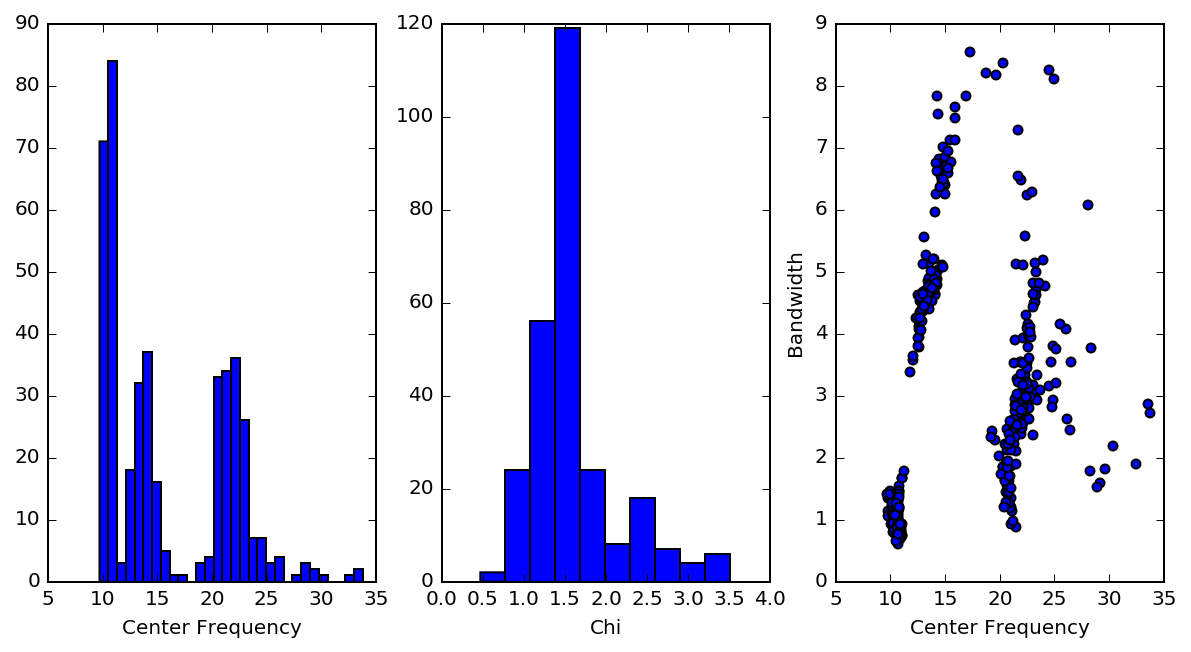

In [7]:
all_cfs = [];
all_bws = [];
all_chi = [];
chis_w_high_cf = [];

for x in xrange(len(psds3)):
    foof = FOOF(min_p=0.1,res = freqs[1]-freqs[0])
    temp_psd= np.expand_dims(psds3[x,bisect.bisect(freqs,3):bisect.bisect(freqs,40)-1].T,axis=1)
    foof.model(freqs[bisect.bisect(freqs,3):bisect.bisect(freqs,40)-1],temp_psd)
    all_cfs.extend(foof.centers_)
    all_bws.extend(foof.stdevs_)
    all_chi.append(foof.chi_)
    for i in foof.centers_:
        if i > 40:
            chis_w_high_cf.append(foof.chi_)
            break
            
print 'Sensor FOOFs'
plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,3,1)
ax1.hist(all_cfs,30)
ax1.set_xlabel('Center Frequency')

ax2 = plt.subplot(1,3,2)
ax2.hist(all_chi)
ax2.set_xlabel('Chi')

ax3 = plt.subplot(1,3,3)
ax3.scatter(all_cfs,all_bws)
ax3.set_xlabel('Center Frequency')
ax3.set_ylabel('Bandwidth')

In [9]:
# scout

    

10.9023981559


(array([  2.,   3.,  15.,  11.,  22.,  11.,   2.,   0.,   1.,   1.]),
 array([ 0.61015884,  0.73922307,  0.86828729,  0.99735152,  1.12641575,
         1.25547997,  1.3845442 ,  1.51360842,  1.64267265,  1.77173688,
         1.9008011 ]),
 <a list of 10 Patch objects>)

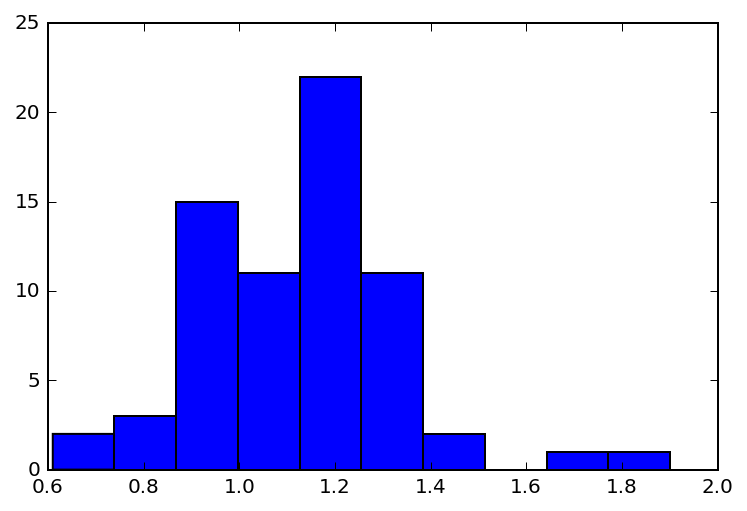

In [31]:
psds.shape

(68, 86)